In [66]:
import Pkg; Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\Carl-Éric\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Carl-Éric\.julia\environments\v1.10\Manifest.toml`


In [67]:
using CSV, DataFrames, Statistics, Dates, Gadfly, LinearAlgebra, Plots

In [69]:
data_2 = CSV.read("./benchmark_1.csv", DataFrame)
data_1 = CSV.read("./soumissions_officielles/soumission_18/benchmark18_equipe_T.csv", DataFrame)
# data_3 = CSV.read("./soumissions_officielles/benchmark_2024-12-01_15-26-35.csv", DataFrame) =#


difference = data_1.consommation - data_2.consommation
diff_df = DataFrame(id=data_1.id, diff=difference)

total_diff = sum(abs.(diff_df.diff).^2)/150

println(total_diff)


6.079591981417769e-5


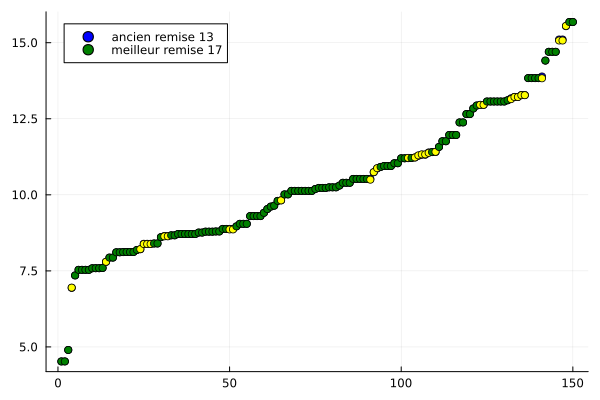

In [ ]:
common_ids = intersect(data_1.id, data_2.id)
diff_ids = filter(id -> data_1[data_1.id .== id, :consommation] != data_2[data_2.id .== id, :consommation], common_ids)
data_1_common = filter(row -> row.id in common_ids, data_1)
data_2_common = filter(row -> row.id in common_ids, data_2)


data_1_sorted = sort(data_1, :consommation)
data_2_sorted = [data_2.consommation[i] for i in data_1_sorted.id]
#= data_3_sorted = [data_3.consommation[i] for i in data_1_sorted.id]
 =#
colors1 = [(i in common_ids ? :blue : :blue) for i in data_1_sorted.id]
colors2 = [(i in diff_ids ? :yellow : :green) for i in data_1_sorted.id]
#= colors3 = [(i in common_ids ? :black : :white) for i in data_1_sorted.id]
 =#

scatter(1:150, data_1_sorted.consommation, c=colors1, label="ancien remise 13")
scatter!(1:150, data_2_sorted, c=colors2, label= "meilleur remise 17")
#= scatter!(1:150, data_3_sorted, c=colors3, label= "new one only lin (?)")
 =#

# scatter(data_1.id, data_1.consommation)
# scatter!(data_2.id, data_2.consommation)
# scatter!(data_3.id, data_3.consommation)

# bleu c<est le meilleur

# orange le dernier



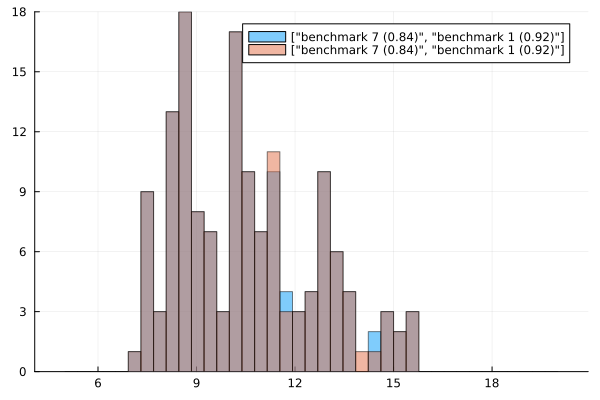

In [ ]:
histogram([data_1.consommation,data_2.consommation], bins=LinRange(5,20,40), alpha=0.5, labels=["benchmark 7 (0.84)", "benchmark 1 (0.92)"])


In [ ]:
data_2_common

Row,id,consommation
,Int64,Float64
1,1,8.11069
2,2,7.59532
3,3,8.66848
4,4,8.71148
5,5,13.8892
6,6,13.8359
7,7,13.8359
8,8,10.2265
9,9,10.9459


In [ ]:
different_ids = [5, 10, 11, 12, 17, 18, 19, 20, 39, 42, 45, 48, 49, 52, 68, 69, 70, 72, 88, 98, 99, 107, 110, 112, 115, 118, 119, 124, 125, 132]

data_1_different = filter(row -> row.id in different_ids, data_1)
data_2_different = filter(row -> row.id in different_ids, data_2)
data_4_different = filter(row -> row.id in different_ids, data_4)

scatter(data_1_different.id, data_1_different.consommation)
scatter!(data_2_different.id, data_2_different.consommation)
scatter!(data_4_different.id, data_4_different.consommation)

LoadError: UndefVarError: `data_4` not defined

In [ ]:
prediction = vcat(data_2_common, data_1_different)
prediction = sort(prediction, :id)

scatter(prediction.id, prediction.consommation)

# d = DataFrame()
# d[!,:id] = data_1.id
# d[!,:diff] = prediction.consommation - data_1.consommation
# # println(d)

# d2 = DataFrame()
# d2[!,:id] = data_1.id
# d2[!,:diff] = prediction.consommation - data_2.consommation
# # println(d2)

# println(prediction)
current_time = Dates.format(now(), "yyyy-mm-dd_HH-MM-SS")
file_name = "benchmark_" * current_time * ".csv"
CSV.write("./soumissions_potentielles/" *file_name, prediction)


"./soumissions_potentielles/benchmark_2024-11-30_13-35-28.csv"

In [ ]:
difference = DataFrame()
difference[!,:id] = data_1.id
difference[!,:diff] = data_2.consommation - data_1.consommation

difference = filter(row -> abs(row[:diff]) > 1, difference)
difference[!,:diff] = sort(difference.diff, by=abs, rev=true)
# difference = sort(difference, :diff, rev=true)
difference

Row,id,diff
,Int64,Float64
1,4,-4.11469
2,5,-4.11469
3,10,-3.3996
4,11,-3.06362
5,12,-2.75908
6,17,2.49037
7,18,2.48775
8,19,2.48775
9,20,2.06268
